In [53]:
import db_dtypes

## Importo lo que aparecía en el canvas del curso

In [54]:
import bq_helper
openAQ = bq_helper.BigQueryHelper(active_project= 'bigquery-public-data.nhtsa_traffic_fatalities.accident_2015',
                                 dataset_name='openaq')

#### Se hace la consulta con el fin de poder visualizar la tabla con la que queremos trabajar, que en este caso es la tabla con 70 columnas 

In [55]:
from google.cloud import bigquery
import pandas as pd
import os

os.environ["GCLOUD_PROJECT"] = "green-objective-382802" #Se linkea con google cloud, usando el id del proyecto que yo creé, ahí es donde se hacen las consultas

client = bigquery.Client() #con esto se pueden empezar a hacer consultas
query = """
SELECT *
FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`

"""
query_job = client.query(query) #Desde query es donde se hace la consulta con SQL

iterator = query_job.result(timeout=30) #se toman los datos para luego convertirlos en una lista 
rows = list(iterator)

headlines = pd.DataFrame(data=[list(x.values()) for x in rows], columns=list(rows[0].keys()))

headlines.head(10) #Hace que se vean solo los 10 primeros, es para tener una muestra



,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,...,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
0,30,Montana,300019,5,5,0,0,0,7,7,...,45,0,None,0,None,0,None,1,0,2015-03-28 14:58:00+00:00
1,39,Ohio,390099,7,7,0,0,0,15,15,...,24,27,Backup Due to Prior Crash,0,None,0,None,1,0,2015-02-14 11:19:00+00:00
2,49,Utah,490123,16,16,0,0,0,28,28,...,99,0,None,0,None,0,None,1,0,2015-04-14 12:24:00+00:00
3,48,Texas,481184,6,5,1,0,5,5,10,...,99,0,None,0,None,0,None,1,0,2015-05-27 16:40:00+00:00
4,41,Oregon,410333,11,11,0,0,0,14,14,...,99,0,None,0,None,0,None,1,0,2015-11-17 18:17:00+00:00
5,39,Ohio,390088,8,8,0,0,0,13,13,...,11,0,None,0,None,0,None,1,0,2015-02-14 11:30:00+00:00
6,39,Ohio,390096,31,31,0,0,0,49,49,...,47,0,None,0,None,0,None,1,0,2015-02-14 14:20:00+00:00
7,42,Pennsylvania,420702,9,9,0,0,0,14,14,...,99,0,None,0,None,0,None,2,0,2015-01-18 07:30:00+00:00
8,39,Ohio,390126,29,29,0,0,0,50,50,...,43,14,Motor Vehicle (In Transport 1983-2004) Struck ...,0,None,0,None,1,0,2015-02-14 14:22:00+00:00
9,34,New Jersey,340244,19,19,0,0,0,24,24,...,3,0,None,0,None,0,None,1,0,2015-02-09 21:11:00+00:00


### 1. Crear y completar un diccionario de datos de la tabla, guardarlo en un archivo de texto separado por comas `.csv`

In [122]:
#Se crea el diccionario q
query12 = """
SELECT *
FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
"""

df = client.query(query12).to_dataframe()

df.to_csv('datos_accidentes_2015.csv', index=False)


In [56]:
#Esto fue una prueba para poder ver si estaba funcionando el llamar a una columna de la lista y poder verla en formato tabla
Busco = """
SELECT  county
FROM bigquery-public-data.nhtsa_traffic_fatalities.accident_2015

"""

p1 = openAQ.query_to_pandas(Busco)
p1

,county
0,111
1,171
2,45
3,65
4,59
...,...
32533,13
32534,181
32535,63
32536,173


In [57]:
#Este es otra prueba porque quería estar segura que de verdad estaba funcionando
query1 = """
SELECT number_of_forms_submitted_for_persons_not_in_motor_vehicles
FROM bigquery-public-data.nhtsa_traffic_fatalities.accident_2015

"""

p2 = openAQ.query_to_pandas(query1)
p2

,number_of_forms_submitted_for_persons_not_in_motor_vehicles
0,0
1,0
2,0
3,0
4,0
...,...
32533,0
32534,0
32535,0
32536,0


In [58]:
query1 = """
SELECT number_of_forms_submitted_for_persons_in_motor_vehicles
FROM bigquery-public-data.nhtsa_traffic_fatalities.accident_2015

"""

p2 = openAQ.query_to_pandas(query1)
p2

,number_of_forms_submitted_for_persons_in_motor_vehicles
0,7
1,15
2,28
3,10
4,14
...,...
32533,7
32534,6
32535,8
32536,6


In [59]:
query1 = """
SELECT city
FROM bigquery-public-data.nhtsa_traffic_fatalities.accident_2015

"""

p2 = openAQ.query_to_pandas(query1)
p2

,city
0,0
1,0
2,0
3,0
4,0
...,...
32533,370
32534,540
32535,0
32536,0


In [60]:
query2 = """
SELECT state_name, COUNT(*) as num_accidents
FROM bigquery-public-data.nhtsa_traffic_fatalities.accident_2015
GROUP BY state_name
ORDER BY num_accidents DESC
"""

p3 = openAQ.query_to_pandas(query2)
p3

,state_name,num_accidents
0,Texas,3190
1,California,3123
2,Florida,2699
3,Georgia,1329
4,North Carolina,1275
5,Pennsylvania,1102
6,New York,1061
7,Ohio,1029
8,Illinois,914
9,South Carolina,911


In [61]:

p3.to_csv('state_name.csv', index=False)

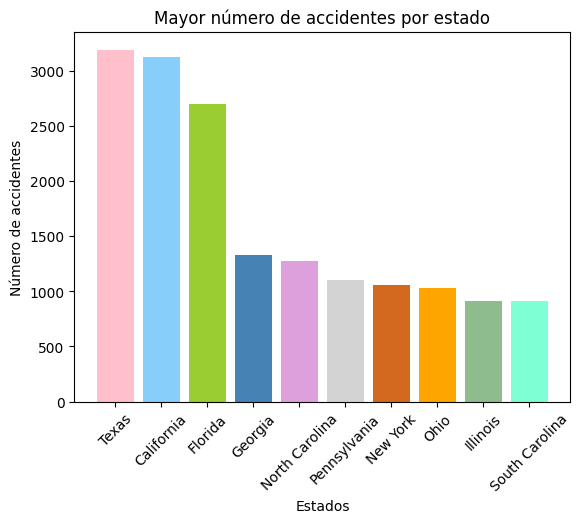

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('C:/Users/carol/OneDrive/Documentos/Universidat/Minería de datos/state_name.csv')
df = df.head(10)
colores = ['pink', 'lightskyblue', 'yellowgreen', 'steelblue', 'plum', 'lightgray', 'chocolate', 'orange', 'darkseagreen', 'aquamarine']
plt.bar(df['state_name'], df['num_accidents'], color=colores)
plt.title('Mayor número de accidentes por estado')
plt.ylabel('Número de accidentes')
plt.xlabel('Estados')
plt.xticks(rotation=45)
plt.show()

In [63]:
#query3 = """
#SELECT land_use_name, COUNT(*) as num_accidents
#FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
#JOIN `bigquery-public-data.nhtsa_traffic_fatalities.land_use` 
#ON `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`.land_use = `bigquery-public-data.nhtsa_traffic_fatalities.land_use`.land_use_id
#GROUP BY land_use_name
#ORDER BY num_accidents DESC
#"""
#p4 = openAQ.query_to_pandas(query3)
#p4




In [64]:
df.iloc[:80,:25]

,state_name,num_accidents
0,Texas,3190
1,California,3123
2,Florida,2699
3,Georgia,1329
4,North Carolina,1275
5,Pennsylvania,1102
6,New York,1061
7,Ohio,1029
8,Illinois,914
9,South Carolina,911


In [65]:
df['land_use_name'].iloc[:10]

KeyError: 'land_use_name'

In [ ]:
query = """
    SELECT IF(land_use IN ('1', '2', '6', '7', '8'), 'Rural', 'Urban') as area_type, COUNT(*) as num_accidents
    FROM `bigquery-public-data.nhtsa_traffic_fatalities.2015`
    GROUP BY area_type
"""

results = client.query(query).to_dataframe()

plt.bar(results['area_type'], results['num_accidents'])
plt.title('Accidentes en áreas rurales y urbanas en 2015')
plt.xlabel('Área')
plt.ylabel('Número de accidentes')
plt.show()

NotFound: 404 Not found: Table bigquery-public-data:nhtsa_traffic_fatalities.2015 was not found in location US

Location: US
Job ID: 1c940637-c33f-4d19-9c4a-e617c311ec3e


ConversionError: Failed to convert value(s) to axis units: array(['Montana', 'Ohio', 'Utah', ..., 'Georgia', 'Ohio', 'Pennsylvania'],
      dtype=object)

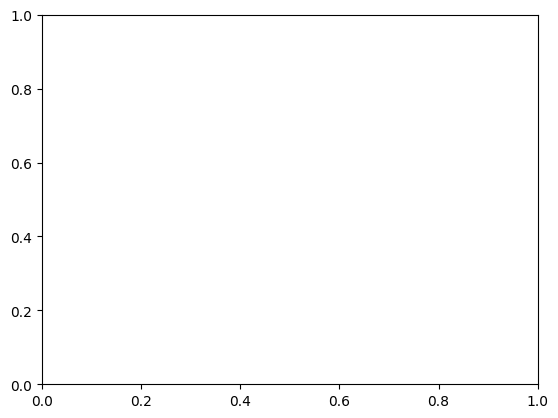

In [ ]:
plt.plot(df)
plt.show()

KeyError: 'num_accidents'

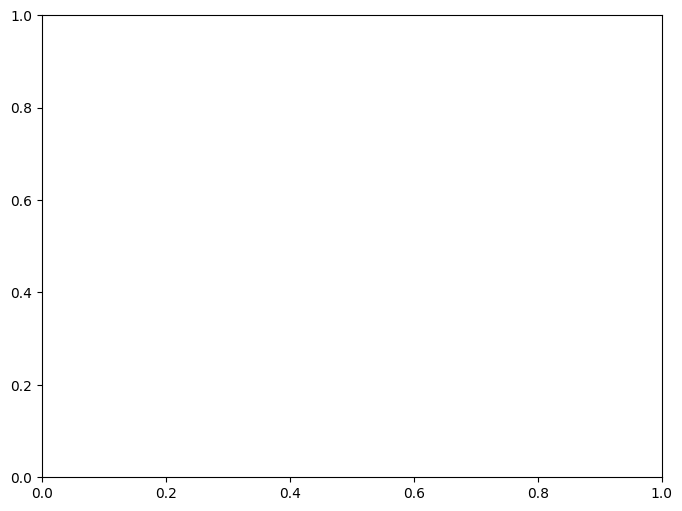

In [ ]:
df_filtered = df[df['land_use_name'].isin(['Rural', 'Urban'])]

fig, ax= plt.subplots(figsize=(8,6))
ax.barh(df_filtered['land_use_name'], df_filtered['num_accidents'])
ax.set_xlabel('Número de accidentes')
ax.set_ylabel('Tipo de uso de la tierra')
ax.set_title('Número de accidentes por tipo de uso de la tierra (2015)')
plt.show()

NameError: name 'result' is not defined

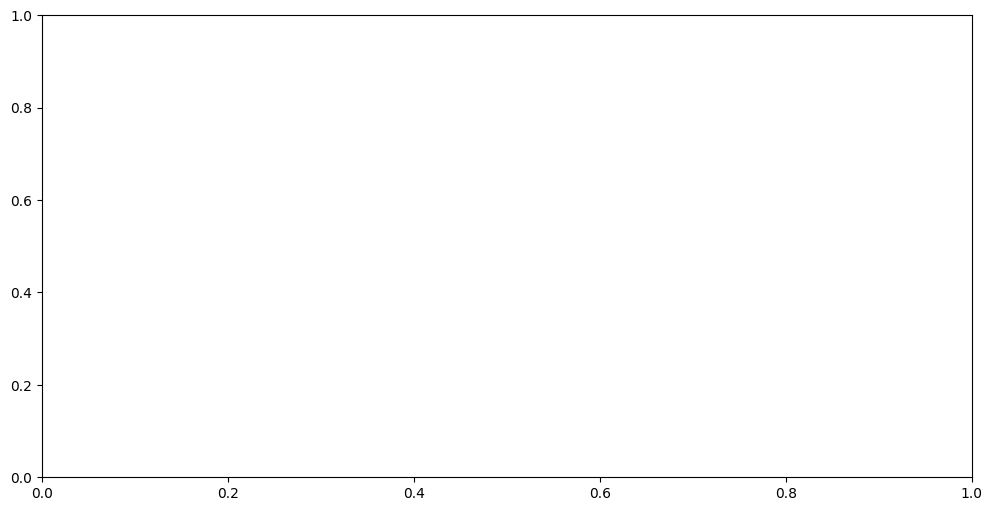

In [ ]:

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(result['land_use_name'], result['num_accidents'])
ax.set_xlabel("Tipo de uso de tierra")
ax.set_ylabel("Número de accidentes")
ax.set_title("Accidentes por uso de tierra en 2015")
plt.xticks(rotation=90)
plt.show()

In [ ]:
query3 = """
SELECT land_use_name, COUNT(*) as num_accidents
FROM bigquery-public-data.nhtsa_traffic_fatalities.accident_2015
GROUP BY land_use_name
ORDER BY num_accidents DESC
"""

p4 = openAQ.query_to_pandas(query3)
p4

,land_use_name,num_accidents
0,Urban,16494
1,Rural,15860
2,Trafficway Not in State Inventory,150
3,Unknown,24
4,Not Reported,10


In [74]:
p4.to_csv('land_use_name.csv', index=False)

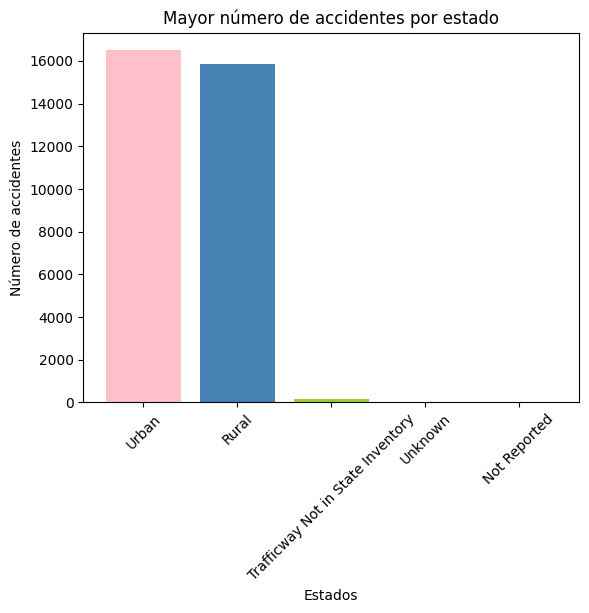

In [76]:
df = pd.read_csv("C:/Users/carol/Downloads/land_use_name.csv")
#df = df.head(10)
colores = ['pink', 'steelblue', 'yellowgreen', 'lightskyblue', 'plum']
plt.bar(df['land_use_name'], df['num_accidents'], color=colores) #las variables del grafico: estado y número de accidentes
plt.title('Mayor número de accidentes por estado')
plt.ylabel('Número de accidentes')
plt.xlabel('Estados')
plt.xticks(rotation=45)
plt.show()

In [ ]:
query4 = """
SELECT ownership_name, COUNT(*) as num_accidents
FROM bigquery-public-data.nhtsa_traffic_fatalities.accident_2015
GROUP BY ownership_name
ORDER BY num_accidents DESC
"""

p5 = openAQ.query_to_pandas(query4)
p5

,ownership_name,num_accidents
0,State Highway Agency,16107
1,Not Reported,6388
2,City or Municipal Highway Agency,3390
3,County Highway Agency,3295
4,Unknown,1139
5,Town or Township Highway Agency,1046
6,Other Local Agency,738
7,Trafficway Not in State Inventory,150
8,State Toll Road,80
9,Other Federal Agency,56


In [ ]:
p5.to_csv('ownership_name.csv', index=False)

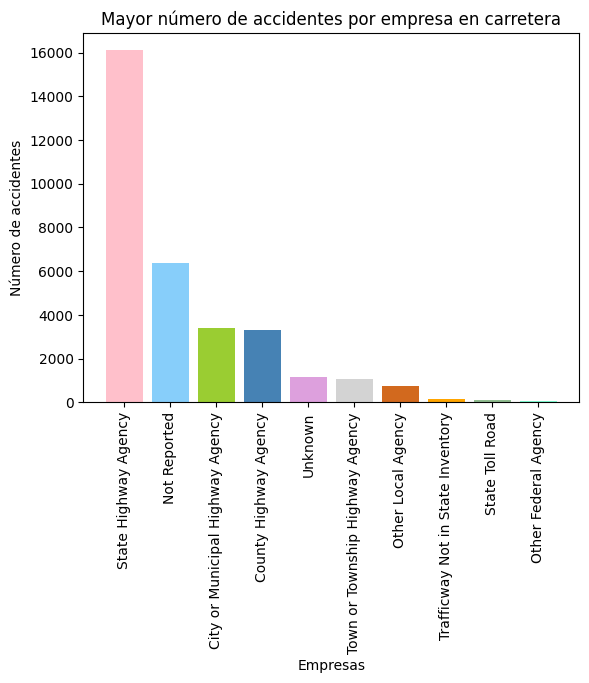

In [78]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("C:/Users/carol/Downloads/ownership_name.csv")
df = df.head(10)
colores = ['pink', 'lightskyblue', 'yellowgreen', 'steelblue', 'plum', 'lightgray', 'chocolate', 'orange', 'darkseagreen', 'aquamarine']
plt.bar(df['ownership_name'], df['num_accidents'], color=colores)
plt.title('Mayor número de accidentes por empresa en carretera')
plt.ylabel('Número de accidentes')
plt.xlabel('Empresas')
plt.xticks(rotation=90)
plt.show()

In [ ]:
query5 = """
SELECT trafficway_identifier, COUNT(*) as num_accidents
FROM bigquery-public-data.nhtsa_traffic_fatalities.accident_2015
GROUP BY trafficway_identifier
ORDER BY num_accidents DESC
"""

p6 = openAQ.query_to_pandas(query5)
p6

,trafficway_identifier,num_accidents
0,I-10,274
1,I-95,213
2,I-75,204
3,US-1,190
4,I-40,159
...,...,...
15673,GRAHAM RD,1
15674,REA RD,1
15675,SR-69 MINEOLA HWY,1
15676,CR-GRAHAM HILL RD,1


In [ ]:
df.iloc[:20,:20]

,ownership_name,num_accidents
0,State Highway Agency,16107
1,Not Reported,6388
2,City or Municipal Highway Agency,3390
3,County Highway Agency,3295
4,Unknown,1139
5,Town or Township Highway Agency,1046
6,Other Local Agency,738
7,Trafficway Not in State Inventory,150
8,State Toll Road,80
9,Other Federal Agency,56


In [ ]:
p6.to_csv('trafficway_identifier.csv', index=False)

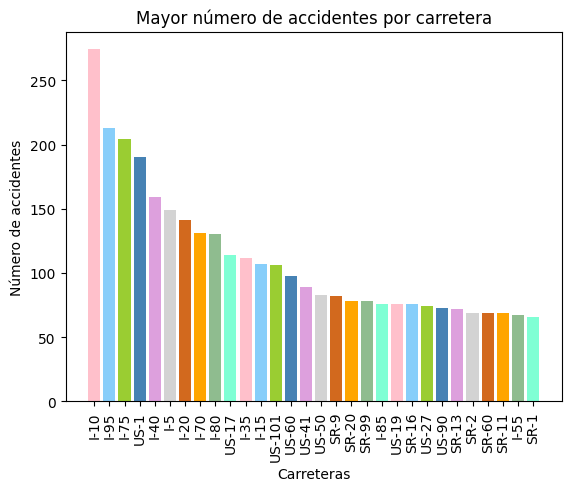

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("C:/Users/carol/Downloads/trafficway_identifier.csv")
df = df.head(30)
colores = ['pink', 'lightskyblue', 'yellowgreen', 'steelblue', 'plum', 'lightgray', 'chocolate', 'orange', 'darkseagreen', 'aquamarine']
plt.bar(df['trafficway_identifier'], df['num_accidents'], color=colores)
plt.title('Mayor número de accidentes por carretera')
plt.ylabel('Número de accidentes')
plt.xlabel('Carreteras')
plt.xticks(rotation=90)
plt.show()

In [80]:
query6 = """
SELECT state_name, EXTRACT(MONTH FROM timestamp_of_crash) as month,COUNT(*) as num_accidents
FROM bigquery-public-data.nhtsa_traffic_fatalities.accident_2015
GROUP BY state_name, month
ORDER BY state_name, month
"""

p7 = openAQ.query_to_pandas(query6)
p7

,state_name,month,num_accidents
0,Alabama,1,50
1,Alabama,2,37
2,Alabama,3,59
3,Alabama,4,69
4,Alabama,5,72
5,Alabama,6,61
6,Alabama,7,73
7,Alabama,8,75
8,Alabama,9,72
9,Alabama,10,83


In [81]:
df = p7.to_csv('timestamp_of_crash.csv', index=False)

In [83]:
df = pd.read_csv("C:/Users/carol/Downloads/timestamp_of_crash.csv")

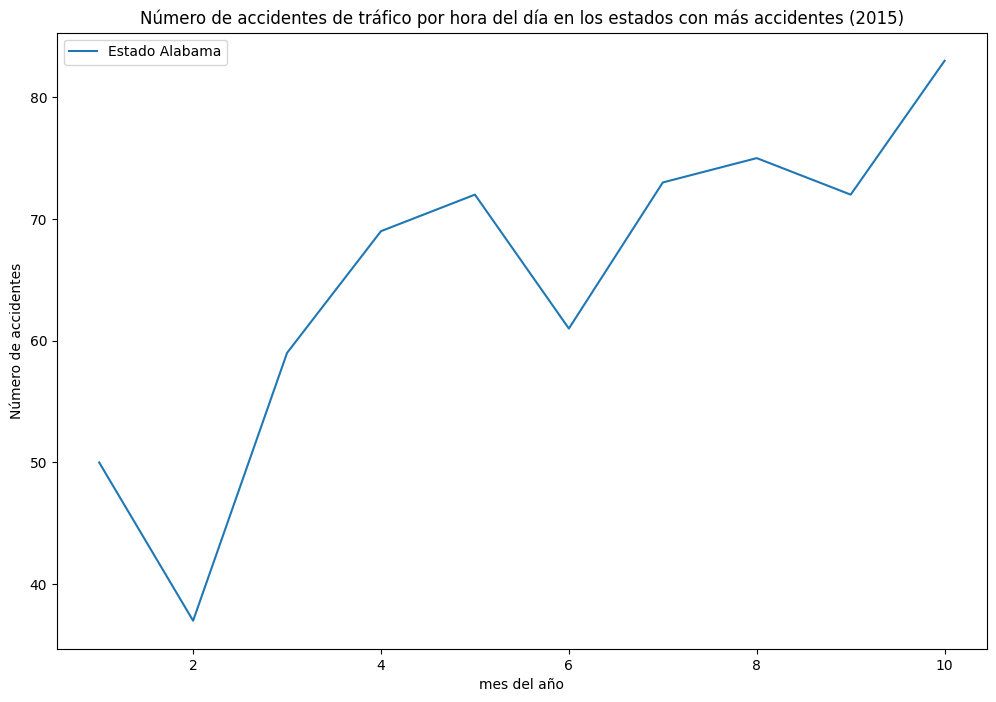

In [84]:
#top_states = df.groupby('state_name').sum().sort_values('num_accidents', ascending=False)

fig, ax = plt.subplots(figsize=(12, 8))

for i, state in enumerate(df['state_name'].unique()):
    state_data = df[df['state_name'] == state]
    hours = state_data['month']
    num_accidents = state_data['num_accidents']
    label = f"Estado {state}"
    ax.plot(hours, num_accidents, label=label)

ax.set_xlabel("mes del año")
ax.set_ylabel("Número de accidentes")
ax.set_title("Número de accidentes de tráfico por hora del día en los estados con más accidentes (2015)")
ax.legend()

# Muestra el gráfico
plt.show()

REALIZAR EL ANALISIS DE ESTO

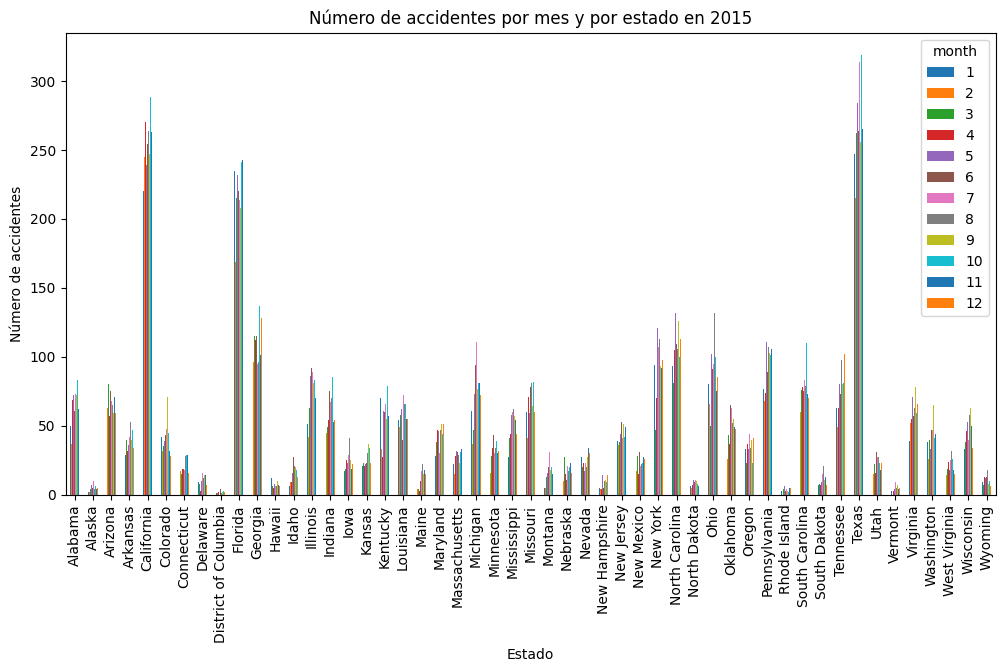

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
df.pivot(index='state_name', columns='month', values='num_accidents').plot(kind='bar', ax=ax)
plt.title('Número de accidentes por mes y por estado en 2015')
plt.xlabel('Estado')
plt.ylabel('Número de accidentes')
plt.show()

debo analizar ???


In [95]:
query7 = """
    SELECT state_name, EXTRACT(HOUR FROM timestamp_of_crash) as hour_of_day, SUM(number_of_fatalities) as number_of_fatalities, SUM(num_accidents) as num_accidents
    FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
    WHERE state_name IN (
        SELECT state_name
        FROM (
            SELECT state_name, SUM(number_of_fatalities) as total_fatalities
            FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
            GROUP BY state_name
            ORDER BY total_fatalities DESC
            LIMIT 8
        )
    )
    GROUP BY state_name, hour_of_day
    ORDER BY state_name, hour_of_day
"""
p8 = openAQ.query_to_pandas(query7)
p8

BadRequest: 400 Unrecognized name: num_accidents at [2:133]

Location: US
Job ID: e586c086-d35b-4dab-b6de-e2f0fd9e146a


In [97]:
query7 = """
    SELECT state_name, EXTRACT(HOUR FROM timestamp_of_crash) as hours, SUM(num_accident) as num_accidents
    FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
    WHERE state_name IN (
        SELECT state_name
        FROM (
            SELECT state_name, SUM(num_accidents) as num_accidents
            FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
            GROUP BY state_name
            ORDER BY num_accidents DESC
            LIMIT 8
        )
    )
    GROUP BY state_name, hours
    ORDER BY state_name, hours
"""
p8 = openAQ.query_to_pandas(query7)
p8
df = p8.to_csv('pa_accident.csv', index=False)
df = pd.read_csv("C:/Users/carol/Downloads/pa_accident.csv")
fig, ax = plt.subplots(figsize=(12, 8))

for i, state in enumerate(df['state_name'].unique()):
    state_data = df[df['state_name'] == state]
    hours = state_data['hour_of_day']
    num_fatalities = state_data['num_accidents']
    label = f"Estado {state}"
    ax.plot(hours, num_fatalities, label=label)

ax.set_xlabel("Hora del día")
ax.set_ylabel("Número de muertes")
ax.set_title("Número de muertes por hora del día en los estados con más accidentes (2015)")
ax.legend()

plt.show()


BadRequest: 400 Unrecognized name: num_accidents at [7:36]

Location: US
Job ID: 1e5bc6b6-1af4-4b5c-906b-a0e22de669a9


In [ ]:
query7 = """
    SELECT state_name, EXTRACT(HOUR FROM timestamp_of_crash) as hour_of_day, SUM(number_of_fatalities) as num_accidents
    FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
    WHERE state_name IN (
        SELECT state_name
        FROM (
            SELECT state_name, SUM(num_accidents) as total_fatalities
            FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
            GROUP BY state_name
            ORDER BY total_fatalities DESC
            LIMIT 8
        )
    )
    GROUP BY state_name, hour_of_day
    ORDER BY state_name, hour_of_day
"""
p8 = openAQ.query_to_pandas(query7)
p8
df = p8.to_csv('number_of_fatalities.csv', index=False)
df = pd.read_csv("C:/Users/carol/Downloads/number_of_fatalities.csv")
fig, ax = plt.subplots(figsize=(12, 8))

for i, state in enumerate(df['state_name'].unique()):
    state_data = df[df['state_name'] == state]
    hours = state_data['hour_of_day']
    num_fatalities = state_data['number_of_fatalities']
    label = f"Estado {state}"
    ax.plot(hours, num_fatalities, label=label)

ax.set_xlabel("Hora del día")
ax.set_ylabel("Número de muertes")
ax.set_title("Número de muertes por hora del día en los estados con más accidentes (2015)")
ax.legend()

# Muestra el gráfico
plt.show()


In [91]:
df = p8.to_csv('number_of_fatalities.csv', index=False)

In [92]:
df = pd.read_csv("C:/Users/carol/Downloads/number_of_fatalities.csv")

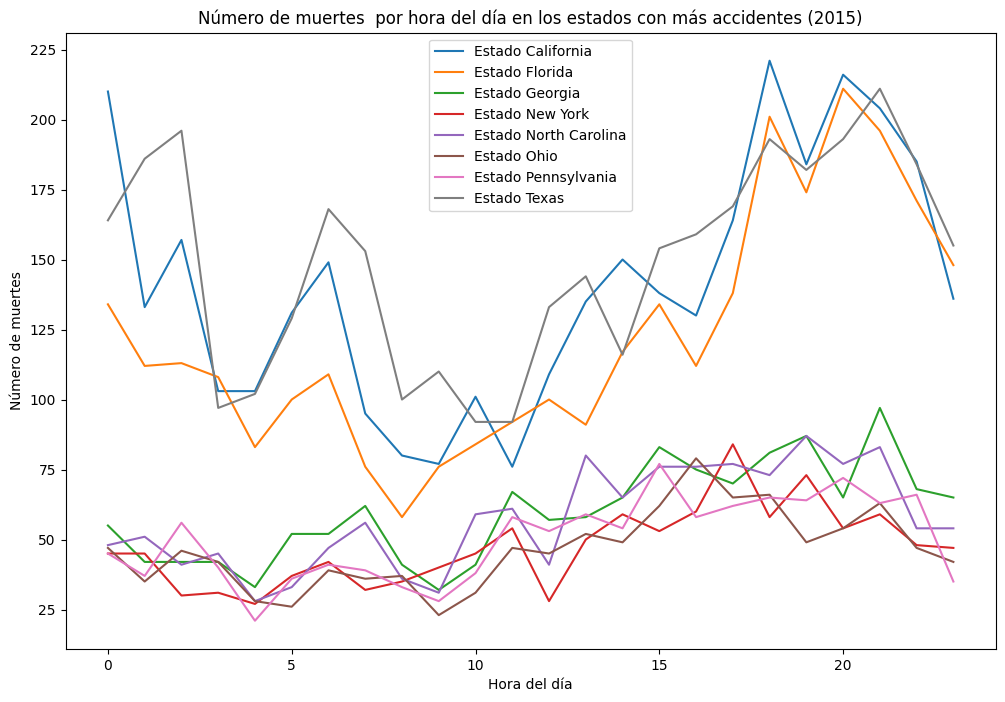

In [98]:
fig, ax = plt.subplots(figsize=(12, 8))

for i, state in enumerate(df['state_name'].unique()):
    state_data = df[df['state_name'] == state]
    hours = state_data['hour_of_day']
    num_fatalities = state_data['number_of_fatalities']
    label = f"Estado {state}"
    ax.plot(hours,num_fatalities, label=label)

ax.set_xlabel("Hora del día")
ax.set_ylabel("Número de muertes")
ax.set_title("Número de muertes  por hora del día en los estados con más accidentes (2015)")
ax.legend()

# Muestra el gráfico
plt.show()

NameError: name 'number_of_fatalities' is not defined

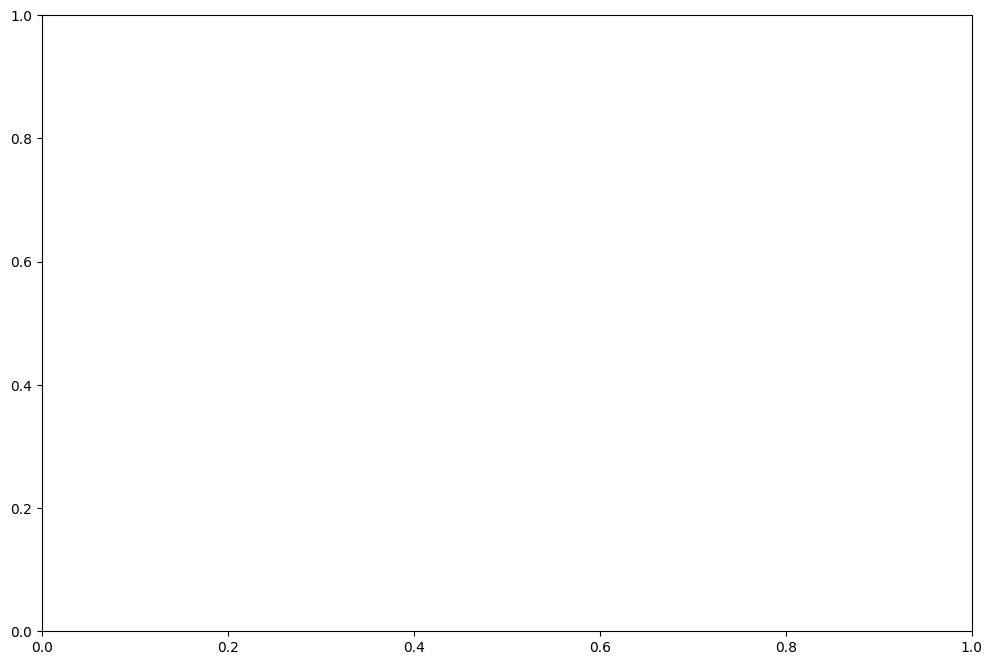

In [94]:
import seaborn as sns
query7 = """
    SELECT state_name, EXTRACT(HOUR FROM timestamp_of_crash) as hour_of_day, SUM(number_of_fatalities) as number_of_fatalities
    FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
    WHERE state_name IN (
        SELECT state_name
        FROM (
            SELECT state_name, SUM(number_of_fatalities) as total_fatalities
            FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
            GROUP BY state_name
            ORDER BY total_fatalities DESC
            LIMIT 8
        )
    )
    GROUP BY state_name, hour_of_day
    ORDER BY state_name, hour_of_day
"""


df = pd.read_gbq(query7, project_id="green-objective-382802")
#df = df.head(10)
fig, ax = plt.subplots(figsize=(12, 8))

for i, state in enumerate(df['state_name'].unique()):
    state_data = df[df['state_name'] == state]
    hours = state_data['hour_of_day']
    num_accidents = state_data['number_of_fatalities']
    label = f"Estado {state}"
    ax.plot(hours, number_of_fatalities, label=label)

ax.set_xlabel("Hora del día")
ax.set_ylabel("Número de muertes")
ax.set_title("Número de muertes  por hora del día en los estados con más accidentes (2015)")
ax.legend()

# Muestra el gráfico
plt.show()







In [ ]:
import seaborn as sns
query7 = """
SELECT state_name, EXTRACT(HOUR FROM timestamp_of_crash) as hour, COUNT(*) as number_of_fatalities
FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
GROUP BY state_name, hour
HAVING state_name IN (
    SELECT state_name
    FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
    GROUP BY state_name
    ORDER BY COUNT(*) DESC
    LIMIT 10
)
ORDER BY state_name, hour
"""
df = pd.read_gbq(query7, project_id="green-objective-382802")
#df = df.head(10)
fig, ax = plt.subplots(figsize=(12, 8))

for i, state in enumerate(df['state_name'].unique()):
    state_data = df[df['state_name'] == state]
    hours = state_data['hour']
    num_accidents = state_data['number_of_fatalities']
    label = f"Estado {state}"
    ax.plot(hours, num_accidents, label=label)

ax.set_xlabel("Hora del día")
ax.set_ylabel("Número de muertes")
ax.set_title("Número de muertes  por hora del día en los estados con más accidentes (2015)")
ax.legend()

# Muestra el gráfico
plt.show()

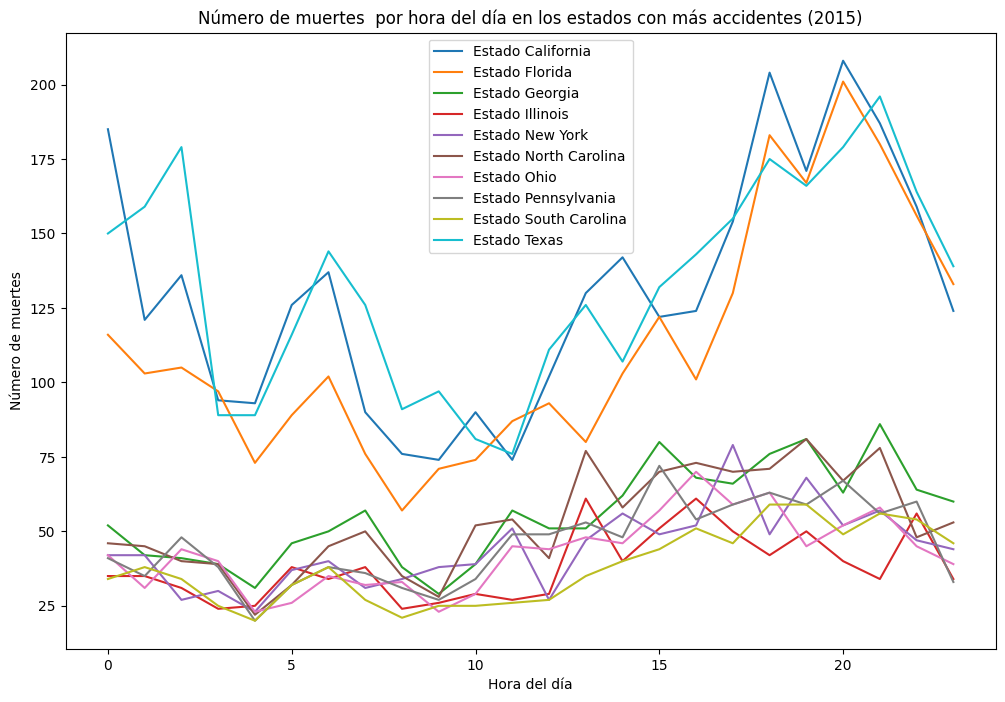

In [69]:
import seaborn as sns
query10 = """
SELECT state_name, EXTRACT(HOUR FROM timestamp_of_crash) as hour, COUNT(*) as num_accidents
FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
GROUP BY state_name, hour
HAVING state_name IN (
    SELECT state_name
    FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
    GROUP BY state_name
    ORDER BY COUNT(*) DESC
    LIMIT 10
)
ORDER BY state_name, hour
"""
df = pd.read_gbq(query10, project_id="green-objective-382802")
#df = df.head(10)
fig, ax = plt.subplots(figsize=(12, 8))

for i, state in enumerate(df['state_name'].unique()):
    state_data = df[df['state_name'] == state]
    hours = state_data['hour']
    num_accidents = state_data['num_accidents']
    label = f"Estado {state}"
    ax.plot(hours, num_accidents, label=label)

ax.set_xlabel("Hora del día")
ax.set_ylabel("Número de muertes")
ax.set_title("Número de muertes  por hora del día en los estados con más accidentes (2015)")
ax.legend()

# Muestra el gráfico
plt.show()

In [105]:
query8 = """
SELECT state_name, COUNTIF(number_of_drunk_drivers > 0) AS num_accidents_with_drunk_drivers, COUNT(*) AS num_accidents
FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
GROUP BY state_name
ORDER BY num_accidents_with_drunk_drivers DESC
"""

p9 = openAQ.query_to_pandas(query8)
p9

df= p9.to_csv('number_of_drunk_drivers.csv', index=False) 


In [106]:
df = pd.read_csv("C:/Users/carol/Downloads/number_of_drunk_drivers.csv")

In [107]:
df['accident_drunk_driver_ratio'] = df['num_accidents'] / df['num_accidents_with_drunk_drivers']

In [121]:
query8 = """
SELECT state_name, COUNTIF(number_of_drunk_drivers > 0) AS num_accidents_with_drunk_drivers, COUNT(*) AS num_accidents
FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
GROUP BY state_name
ORDER BY num_accidents_with_drunk_drivers DESC
"""
df['accident_drunk_driver_ratio'] = df['num_accidents'] / df['num_accidents_with_drunk_drivers']

df

,state_name,num_accidents_with_drunk_drivers,num_accidents,accident_drunk_driver_ratio
0,California,959,3123,3.256517
1,Texas,849,3190,3.757362
2,Florida,626,2699,4.311502
3,North Carolina,389,1275,3.277635
4,Pennsylvania,332,1102,3.319277
5,Ohio,324,1029,3.175926
6,Georgia,296,1329,4.489865
7,South Carolina,296,911,3.077703
8,Illinois,289,914,3.16263
9,Tennessee,269,888,3.301115


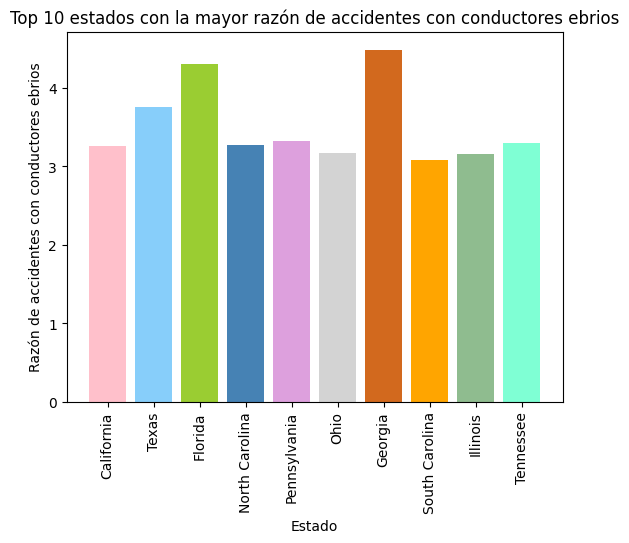

In [120]:
import matplotlib.pyplot as plt
colores = ['pink', 'lightskyblue', 'yellowgreen', 'steelblue', 'plum', 'lightgray', 'chocolate', 'orange', 'darkseagreen', 'aquamarine']
plt.bar(df['state_name'].head(20), df['accident_drunk_driver_ratio'].head(20), color= colores)
plt.xticks(rotation=90)
plt.xlabel('Estado')
plt.ylabel('Razón de accidentes con conductores ebrios')
plt.title('Top 10 estados con la mayor razón de accidentes con conductores ebrios')
plt.show()
